In [1]:
import glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## График отношений qvalue / intersection

In [2]:
def parse_rna_type(type):
    if type.endswith("pseudogene"):
        return "pseudogene"
    elif type in ["snRNA", "snoRNA", "Xrna", "miRNA", "antisense", "protein_coding"]:
        return type
    elif type in ["lncRNA", "vlinc", "lincRNA", "bidirectional_promoter_lncRNA"]:
        return "long non-coding RNA"
    else:
        return "other"

df = pd.read_table("intersize_qval/RNA_WINDOW_100_DNA_WINDOW_2000.tsv", header=None).rename(
    columns={0:"rna_type", 1:"log_qval_macs2", 2:"log_qval_piranha", 3:"DNA_int", 4:"RNA_int"})
df["log_qval_piranha"] =  -1 * np.log10(df["log_qval_piranha"] + 10E-15)
df["rna_type"] = df["rna_type"].apply(lambda x: parse_rna_type(x))

### DNA

<Axes: xlabel='DNA_int', ylabel='log_qval_macs2'>

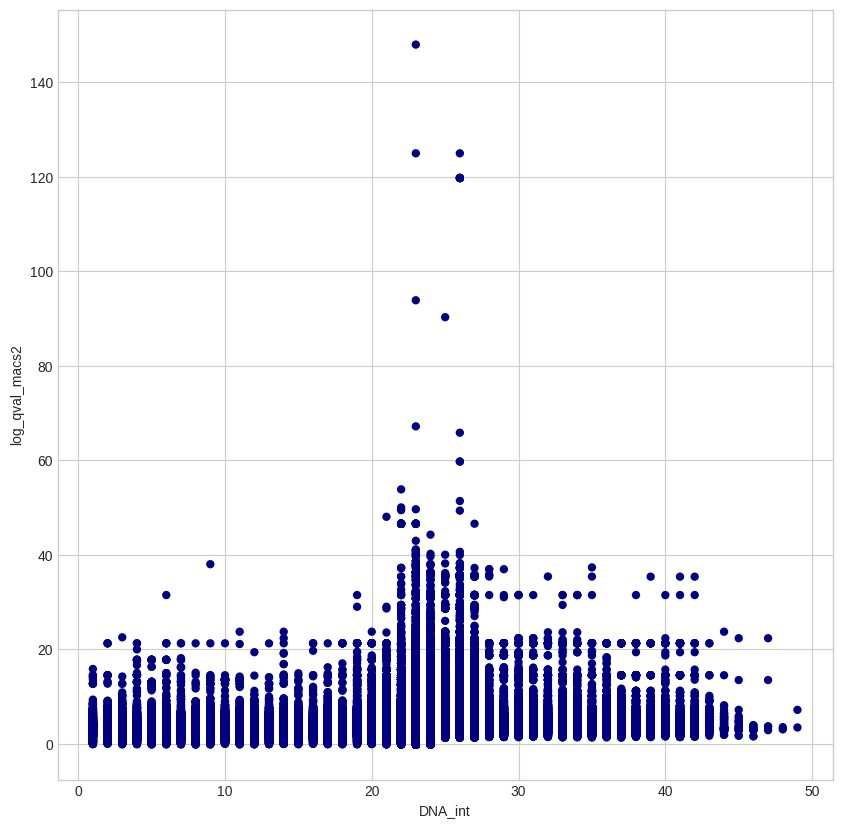

In [6]:
plt.figure(figsize=(10, 10))
plt.style.use("seaborn-v0_8-whitegrid")

sns.scatterplot(data=df, 
                y="log_qval_macs2", x="DNA_int", ec=None, color="navy")

### RNA

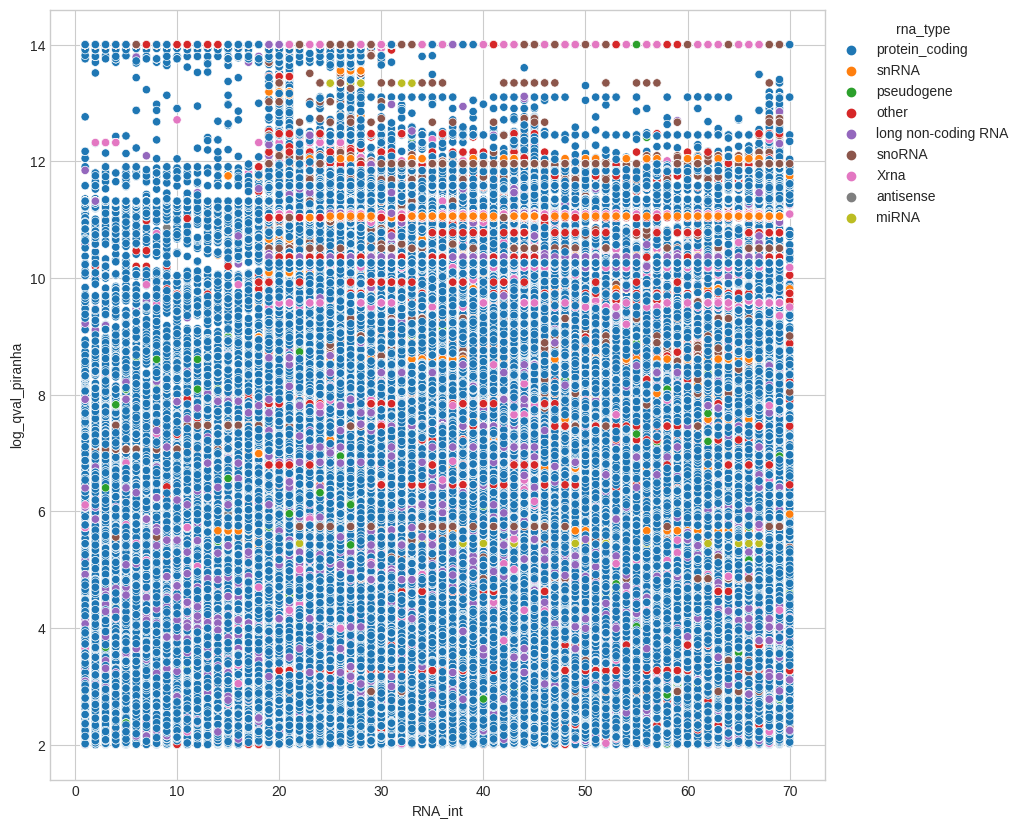

In [5]:
plt.figure(figsize=(10, 10))
plt.style.use("seaborn-v0_8-whitegrid")

ax = sns.scatterplot(data=df, 
                     y="log_qval_piranha", x="RNA_int", hue="rna_type")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

### Jointplots

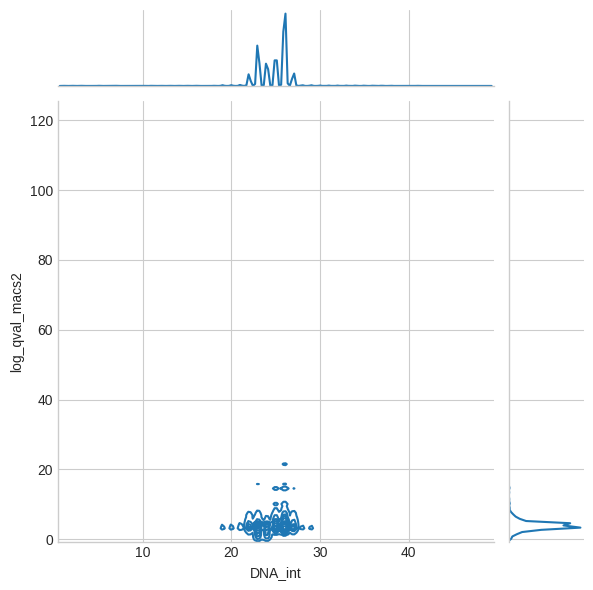

In [14]:
sns.jointplot(data=df, y="log_qval_macs2", x="DNA_int", kind="kde")

## Correlations

In [7]:
from scipy.stats import spearmanr

print("With protein_coding")
print(f"DNA correlations ~ {spearmanr(df.DNA_int, df.log_qval_macs2)}")
print(f"RNA correlations ~ {spearmanr(df.RNA_int, df.log_qval_piranha)}")

With protein_coding
DNA correlations ~ SignificanceResult(statistic=0.06795627821494579, pvalue=0.0)
RNA correlations ~ SignificanceResult(statistic=-0.2541743782525708, pvalue=0.0)


In [8]:
df = df[df["rna_type"] != "protein_coding"]

print("Without protein_coding")
print(f"DNA correlations ~ {spearmanr(df.log_qval_macs2, df.DNA_int)}")
print(f"RNA correlations ~ {spearmanr(df.RNA_int, df.log_qval_piranha)}")

Without protein_coding
DNA correlations ~ SignificanceResult(statistic=0.07017692760768045, pvalue=0.0)
RNA correlations ~ SignificanceResult(statistic=-0.21472128413028518, pvalue=0.0)
